# Deeper analysis of the data
The data is split into 10 classes, search for important attributes for each class.
or each **`train_smpl_<label>`** file, record the first 10 pixels, in order of the absolute
correlation value, for each street sign.

In [1]:
from Scripts.NaiveBayse import SamNaiveBayseGaussian as nbg

model = nbg.build_nbg_models()

Dataset:  -1  Has results: [0 1 2 3 4 5 6 7 8 9]
(7752, 2304) (1938, 2304) (7752, 1) (1938, 1)
float64
Dataset:  0  Has results: [0 1]
(7752, 2304) (1938, 2304) (7752, 1) (1938, 1)
float64
Dataset:  1  Has results: [0 1]
(7752, 2304) (1938, 2304) (7752, 1) (1938, 1)
float64
Dataset:  2  Has results: [0 1]
(7752, 2304) (1938, 2304) (7752, 1) (1938, 1)
float64
Dataset:  3  Has results: [0 1]
(7752, 2304) (1938, 2304) (7752, 1) (1938, 1)
float64
Dataset:  4  Has results: [0 1]
(7752, 2304) (1938, 2304) (7752, 1) (1938, 1)
float64
Dataset:  5  Has results: [0 1]
(7752, 2304) (1938, 2304) (7752, 1) (1938, 1)
float64
Dataset:  6  Has results: [0 1]
(7752, 2304) (1938, 2304) (7752, 1) (1938, 1)
float64
Dataset:  7  Has results: [0 1]
(7752, 2304) (1938, 2304) (7752, 1) (1938, 1)
float64
Dataset:  8  Has results: [0 1]
(7752, 2304) (1938, 2304) (7752, 1) (1938, 1)
float64
Dataset:  9  Has results: [0 1]
(7752, 2304) (1938, 2304) (7752, 1) (1938, 1)
float64
Scores for dataset:  All Classes
Trai

In [13]:
from Scripts import helperfn as hf

X, y = hf.get_data(8)


In [11]:
import matplotlib.pyplot as plt
import numpy as np

# X['333'].corr(y['y'])

onlyOne = X['0'].astype(int).to_frame()

appended = hf.append_result_col(onlyOne, y)
corrMatrix = appended.corr(method='spearman')


result = []

for i in range(X.shape[1]):
    result.append(X[str(i)].corr(y['y']))

result = np.array(result)

In [4]:
#make 3 datasets

#one for each corroloation method

#each datsaet will contain the dataset of the column and y label

res_arr = []

for i in range(100):

    index = np.argmax(result)
    res_arr.append(index)

    result = np.delete(result, index)

print(res_arr)

[1362, 982, 1029, 1313, 1312, 1076, 1403, 1029, 1402, 934, 1500, 1262, 1446, 1498, 1493, 1446, 981, 1352, 1493, 1352, 1489, 1029, 1072, 1486, 1074, 1486, 1485, 983, 1257, 885, 1115, 73, 1434, 25, 1116, 930, 1069, 1114, 119, 72, 1022, 25, 117, 1510, 1156, 1508, 1512, 1196, 975, 70, 1200, 1419, 115, 70, 24, 1333, 1424, 1150, 976, 113, 1018, 925, 1230, 351, 1281, 303, 24, 157, 1491, 870, 1231, 300, 1484, 1356, 343, 1484, 1407, 917, 157, 1051, 1360, 345, 344, 1401, 919, 392, 1355, 1398, 392, 341, 343, 388, 388, 341, 299, 903, 297, 860, 296, 296]


In [6]:
from Scripts import pixelFinder as pf 
%load_ext autoreload
%autoreload 2

best = pf.bestPixels(X, y, 2304)

# print(best)

NameError: name 'X' is not defined

In [13]:
temp = np.array(best)
np.unique(temp).shape

(2304,)

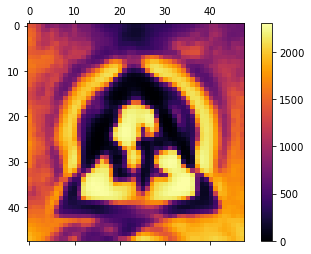

In [28]:
import matplotlib.pyplot as plt

sort = np.empty(2304, dtype=int)

for i in range(2304):
    index = best[i]
    sort[index] = i


sort2d = np.reshape(sort, (-1, 48))

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(sort2d, interpolation='nearest', cmap='inferno')
fig.colorbar(cax)


plt.show()

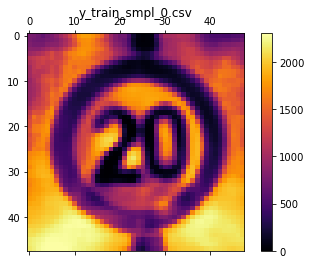

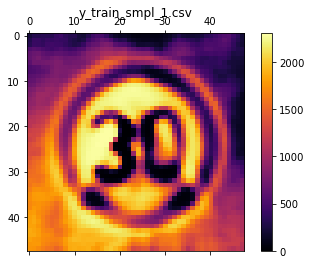

KeyboardInterrupt: 

In [19]:
pf.showHeatmap()